<p style="text-align: center; font-weight: bold; font-size:xxx-large; color:green; background-color:#D3EAB9;">Coffee</p>

<img src="Images/coffee_image1.PNG" />

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">Do you ever wonder the significance of all those regions and types printed on bags of coffee?</p>

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">Do any of them truly indicate superior coffee?</p>  

In [199]:
# @hidden_cell
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_theme(style='darkgrid')
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [191]:
df = pd.read_csv("coffee_region_variety_totals")

In [4]:
df['Outstanding'] = df['Total_Cup_Points'].astype('int64') # a new column created that will indicate if "Outstanding" or not
df.loc[df["Outstanding"]<85, ["Outstanding"]]=0 # A "0" indicates not "Outstanding"
df.loc[df["Outstanding"]>=85, ["Outstanding"]]=1 # A "1" indicates "Outstanding"
df['Outstanding'] = df['Outstanding'].astype(int)

In [67]:
df.loc[df["Country_of_Origin"]=='Costa Rica', ["Country_of_Origin"]]='Costa_Rica'

In [70]:
df.tail(30)

,Country_of_Origin,Region,Variety,Total_Cup_Points,Outstanding
1280,Mexico,zaragoza itundujia,Typica,74.92,0
1281,Mexico,coatepec,Typica,74.83,0
1282,Guatemala,oriente,Bourbon,74.75,0
1283,Guatemala,oriente,Bourbon,74.75,0
1284,Mexico,chiapas,Typica,74.67,0
1285,Hawaii_US,kona,Hawaiian Kona,74.42,0
1286,Guatemala,oriente,Bourbon,74.33,0
1287,Mexico,"chocaman, veracruz",Typica,74.33,0
1288,Mexico,xalapa,Typica,74.00,0
1289,Mexico,coatepec,Typica,73.83,0


In [6]:
#df_shuffled = df.sample(frac=1) #this shuffled data set will be split into test and training data
#df_train = df_shuffled.head(1114); #1114 is 85% of the dataset
#df_test = df_shuffled.tail(196);

In [7]:
aspects = ["aroma", "flavor", "aftertaste", "acidity", "body", "balance", "uniformity", "clean_cup", "sweetness"]

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">The Coffee Quality Institue (https://www.coffeeinstitute.org/) measures these attributes to calculate a total quality score.</p>

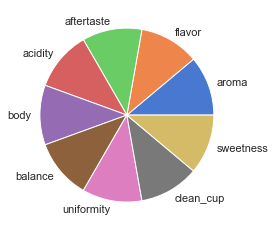

In [8]:
g = [1, 1, 1, 1, 1, 1, 1, 1, 1]
colors = sns.color_palette('muted')
fig, ax = plt.subplots()
ax.pie(g, labels = aspects, colors=colors);

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">Here are the countries represented in the database:</p>

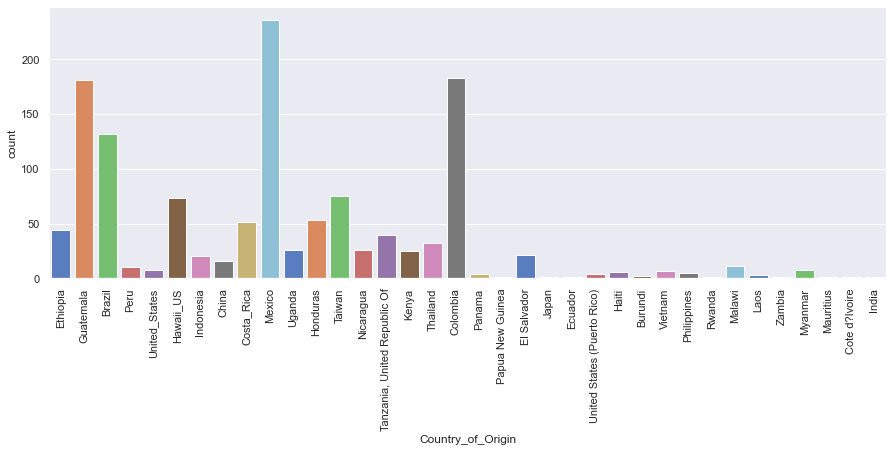

In [69]:
plt.figure(figsize=[15, 5])
plt.subplot(111)
sns.countplot(x='Country_of_Origin', data=df, palette='muted')
plt.xticks(rotation=90);

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">The 40 most represented regions within those countries:</p>

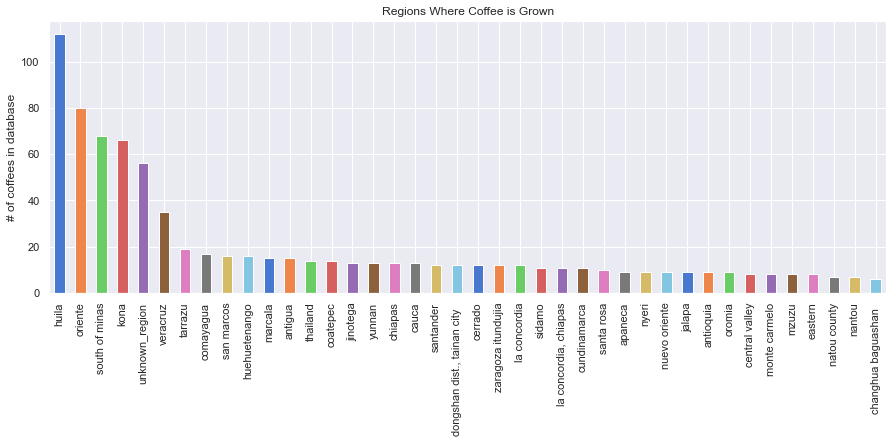

In [10]:
colors = sns.color_palette('muted')
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
df.Region.value_counts().head(40).plot(kind="bar", color = colors, title = 'Regions Where Coffee is Grown', 
                                       ylabel = '# of coffees in database');

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">And these are the top varieties grown:</p>

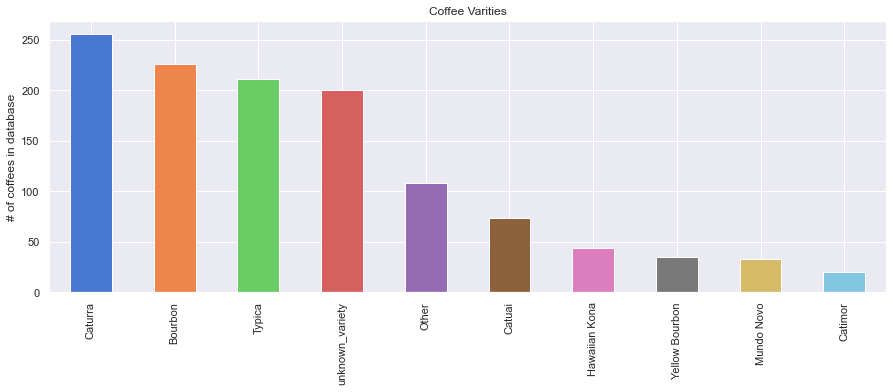

In [11]:
colors = sns.color_palette('muted')
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
df.Variety.value_counts().head(10).plot(kind="bar", color = colors, title = 'Coffee Varities', 
                                        ylabel = '# of coffees in database');

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">A coffee is considered "outstanding" if it scores a total of 85 or higher. This is roughly 10% of coffes tested, like getting an "A" grade in quality.</p>

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">A very few regions produced more than one "Outstanding" coffee in this dataset.</p>


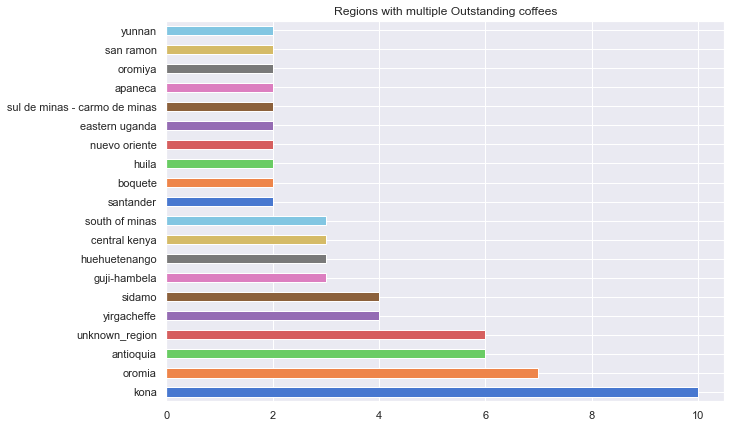

In [12]:
colors = sns.color_palette('muted')
df_outstanding = df[df['Outstanding'] == 1]
df_outstanding_top = df_outstanding.Region.value_counts().head(20)
df_outstanding_top.plot(kind = 'barh', color = colors, sort_columns = True, figsize = (10, 7), 
                        title = 'Regions with multiple Outstanding coffees');

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">The "outstanding" variety appears to differ according to the country. Perhaps these are the varities best suited to their climate.</p>

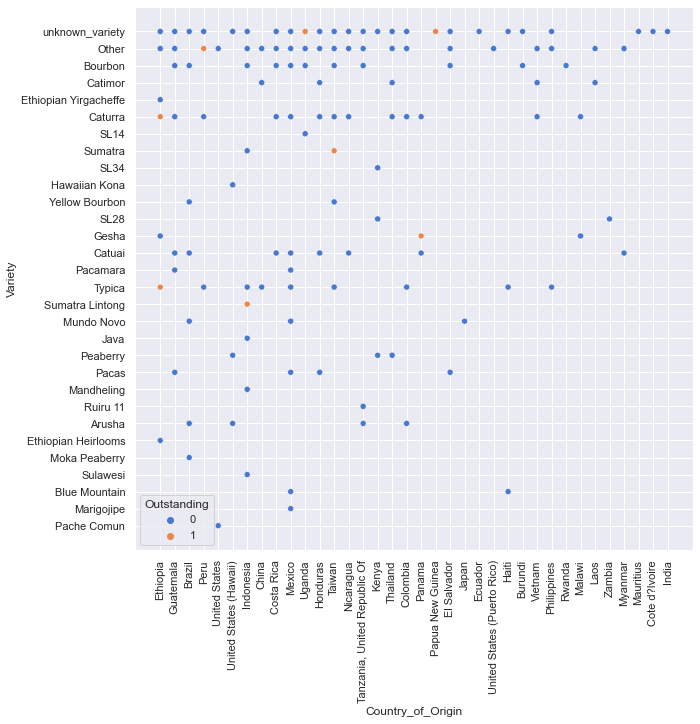

In [13]:
plt.figure(figsize=[10, 10])
plt.subplot(111)
sns.scatterplot(data=df, x='Country_of_Origin', y='Variety', hue='Outstanding', palette='muted')
plt.xticks(rotation=90);

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">While most varities vary from poor to excellent quality, one outlier is consistently great with a large dataset - the Ethiopian Yirgacheffe .</p>

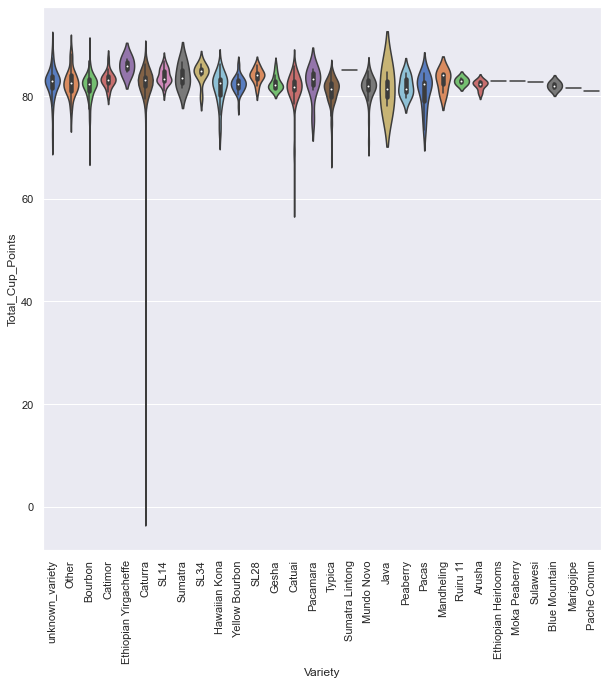

In [14]:
plt.figure(figsize=[10, 10])
plt.subplot(111)
sns.violinplot(data=df, x='Variety', y='Total_Cup_Points', palette='muted', scale = 'width')
plt.xticks(rotation=90);

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">In regards to country of origin, Ethopia also seems to be top of the pack overall.</p>

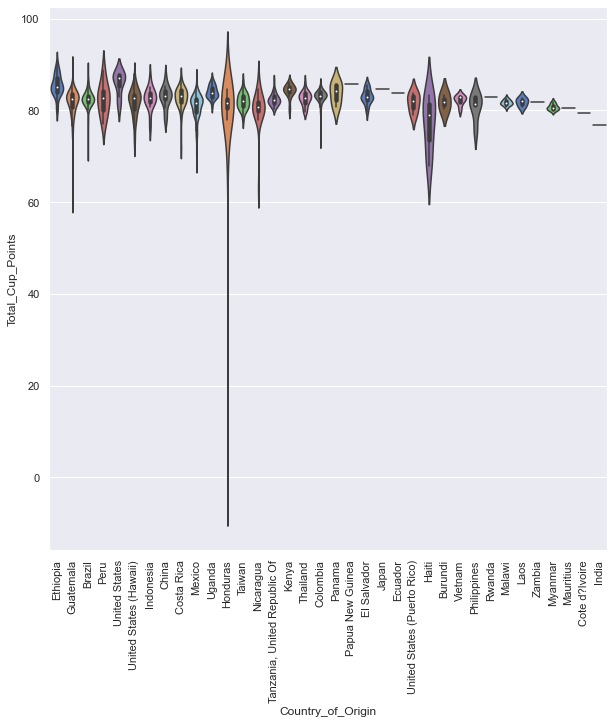

In [15]:
plt.figure(figsize=[10, 10])
plt.subplot(111)
sns.violinplot(data=df, x='Country_of_Origin', y='Total_Cup_Points', palette='muted', scale = 'width')
plt.xticks(rotation=90);

In [129]:
df_shuffled = df.sample(frac=1) #create a shuffled data set to choose test and training data from

In [130]:
df_shuffled_simple = df_shuffled.drop(['Total_Cup_Points', 'Region'], axis=1) #drop unnecessary columns

In [131]:
df_country = pd.get_dummies(df_shuffled_simple['Country_of_Origin']) #create dummy columns to encode country categories

In [132]:
df_variety = pd.get_dummies(df_shuffled_simple['Variety']) #create dummy columns to encode variety categories

In [133]:
#add country dummy columns to original and drop country column
df_join1 = df_shuffled_simple.join(df_country) 
df_join1.drop('Country_of_Origin', axis=1, inplace=True)

In [134]:
#add variety dummy columns to previous and drop variety column
df_join2 = df_join1.join(df_variety)
df_join2.drop('Variety', axis=1, inplace=True)

In [135]:
df_join2.head(10)

,Outstanding,Brazil,Burundi,China,Colombia,Costa_Rica,Cote d?Ivoire,Ecuador,El Salvador,Ethiopia,...,Ruiru 11,SL14,SL28,SL34,Sulawesi,Sumatra,Sumatra Lintong,Typica,Yellow Bourbon,unknown_variety
1210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
812,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1291,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [139]:
X = df_join2.drop(['Outstanding'], axis=1).values

In [141]:
y = df_join2['Outstanding'].values

In [143]:
#create test and train splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=10)

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
#This trained the data
classifier = LogisticRegression(random_state=10)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [147]:
y_predict = classifier.predict(X_test)

Text(0.5, 1.0, 'Analyzing our model')

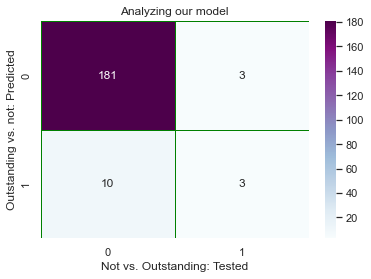

In [185]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt='d', cmap="BuPu", linewidths=0.5, linecolor='green', xticklabels=True, yticklabels=True)
plt.xlabel("Not vs. Outstanding: Tested")
plt.ylabel("Outstanding vs. not: Predicted")
plt.title("Analyzing our model")

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict));

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       184
           1       0.50      0.23      0.32        13

    accuracy                           0.93       197
   macro avg       0.72      0.61      0.64       197
weighted avg       0.92      0.93      0.92       197

